### Algoritmos de ML

![picture](https://drive.google.com/uc?export=view&id=1SOpvXI-6rdzRa5KDDzWgyLn8U5Z0wWdd)




![picture](https://drive.google.com/uc?export=view&id=1-CSGX4SFZ_as9itQ2C2v3apx2_lapCOL)



* **Cantidad insuficiente de datos de entrenamiento**: Se necesitan muchos datos para que la mayoría de los algoritmos de ML funcionen correctamente. 

* **Datos de entrenamiento no representativos**: Para generalizar bien, es crucial que los datos de entrenamiento sean representativos de los nuevos casos que desea generalizar. (sesgo en el muestreo)

* **Datos de baja calidad**: si los datos de entrenamiento están llenos de ruido, será más difícil para el algoritmo detectar los patrones.

* **Características irrelevantes**: El sistema solo será capaz de aprender si los datos de entrenamiento contienen suficientes características relevantes y no demasiadas irrelevantes. 

Parámetros: Aprendidos directamente por entrenamiento
<ul>
<li>Coeficientes de la regresión lienal</li>
<li>Pesos de una red neuronal</li>
</ul> 

Hiperparámetros: Pueden ser asignados manualmente por el usuario 
<ul>
<li>k en algortimo KNN</li>
<li>rata de aprendizaje de una red neuronal</li>
<li>Maxima profundidad en un algoritmo de árbol</li>
</ul> 

### Modelos 

##### Calculos analiticos en base a distribuciones de datos (¿100% de acierto?)

In [351]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

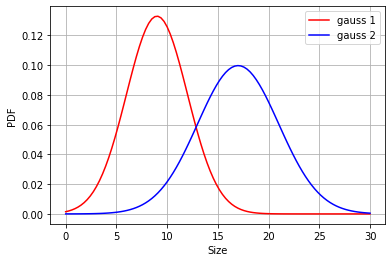

In [352]:
datos1 = stats.norm(loc=9,scale=3)
datos2 = stats.norm(loc=17,scale=4)

x = np.linspace(0,30,100)
plt.plot(x, datos1.pdf(x), color="red", label="gauss 1")
plt.plot(x, datos2.pdf(x), color="blue", label="gauss 2")
plt.xlabel('Size')
plt.ylabel('PDF')
plt.grid()
plt.legend();

frontera óptima en 12.85


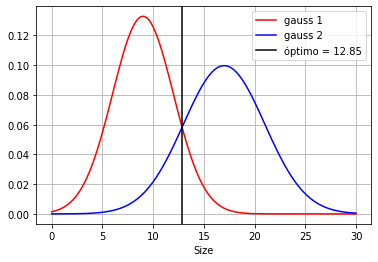

In [353]:
x = np.linspace(5,25,1000)
minx = x[np.argmin(np.abs(datos1.pdf(x)-datos2.pdf(x)))]

print ("frontera óptima en %.2f"%minx)

x = np.linspace(0,30,100)
plt.plot(x, datos1.pdf(x), color="red", label="gauss 1")
plt.plot(x, datos2.pdf(x), color="blue", label="gauss 2")
plt.axvline(minx, color="black", label=u"óptimo = %.2f"%minx)
plt.xlabel('Size')
plt.ylabel
('PDF')
plt.grid()
plt.legend();

## Regresión lienal

Como recordarás la ecuación de una línea recta está dada por la ecuación

$$Y = m*X+b$$ 

parámetros del modelo en este caso m y b

objetivo: encontrar los parámetros que minimicen el error al intentar predecir y dado una x

In [354]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Diamantes=pd.read_csv('/content/drive/MyDrive/notebook SIC-2022/DiamondsPrices.csv')
Diamantes.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [355]:
X = Diamantes['carat'].values.reshape(-1,1)
y = Diamantes['price'].values.reshape(-1,1)
X.shape, y.shape

((53940, 1), (53940, 1))

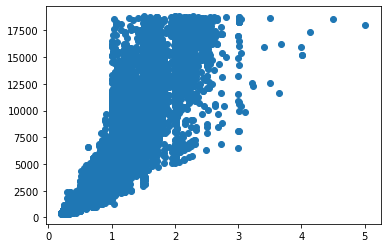

In [356]:
plt.scatter(X,y)

In [357]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
print(len(X_train))
print(len(X_test))

43152
10788


In [359]:
linear  = LinearRegression(normalize=True)
linear.fit(X_train,y_train)
y_pred = linear.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


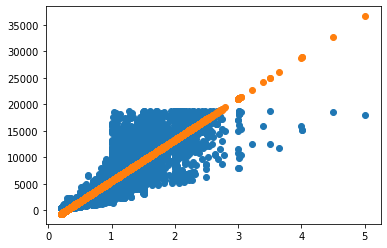

In [360]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,y_pred)

In [361]:

print('R2 =',linear.score(X_train,y_train))
print('R2 =',linear.score(X_test,y_test))

R2 = 0.8495154450504573
R2 = 0.8485711261881463


In [362]:
print('w1 =',linear.coef_)
print('w0 =',linear.intercept_)

w1 = [[7762.71282134]]
w0 = [-2258.13047451]


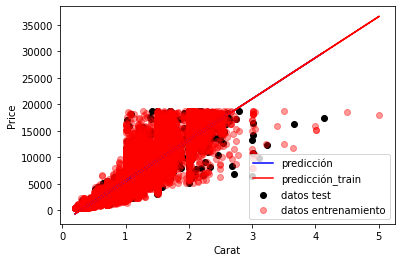

In [363]:
y_pred_2 = linear.predict(X_test)

plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred_2, color='blue',label=r'predicción')
plt.plot(X_train, y_pred, color='red',label=r'predicción_train')
plt.legend(loc='lower right')

plt.xlabel(r'Carat')
plt.ylabel(r'Price')

plt.show()

In [364]:
from sklearn import metrics
## Coeficiente de correlación nos permite conocer cómo de bien se pueden predecir  los resultados. Relación con una o más variables. 
print('R2: ', metrics.r2_score(y_test, y_pred_2))

R2:  0.8485711261881463


### Métricas de errores

las métricas más populares encontramos:

* Error medio absoluto (MAE)

$$MAE = \frac{1}{m}\sum_{i=1}^{m}|\hat{y}_i -y_i|$$

* Error cuadrático medio (MSE)

$$MSE=\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}_i -y_i\right)^2$$

* Raíz del error cuadrático medio (RMSE)

$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}({\bf x})_i -y_i\right)^2}$$

Estas métricas las podemos obtener del módulo [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn. 

In [365]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_2)/y_test.mean())
print('MSE: ', metrics.mean_squared_error(y_test, y_pred_2)/y_test.mean()**2)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2))/y_test.mean())

MAE:  0.2549399691755366
MSE:  0.15349147106522212
RMSE:  0.3917798757787619


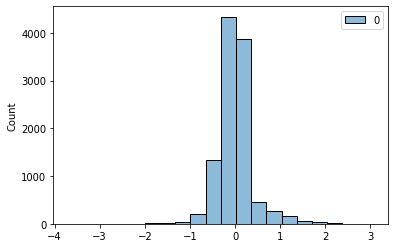

In [366]:
sns.histplot((y_test - y_pred_2)/y_test.mean(), bins = 20)
plt.show()

### Regresión logística

* se usa para determinar la probabilidad de que una instancia pertenezca a una clase particular. 

\begin{equation*}
\hat{y} = \begin{cases}
1 &\hat{p}\geq0.5\\
0 &\hat{p}<0.5
\end{cases}
\end{equation*}

y su probabilidad

\begin{equation}
\hat{p}=h_w(\mathbf{x})=\sigma(\mathbf{x}^T\mathbf{w})
\end{equation}

donde: 


\begin{equation}
\sigma(t)=\frac{e^{t}}{1+e^{-t}}
\end{equation}


In [367]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoide(x):
    output = np.exp(x)/(1+np.exp(x))
    return output

Text(0.5, 1.0, 'Función logística o sigmoide')

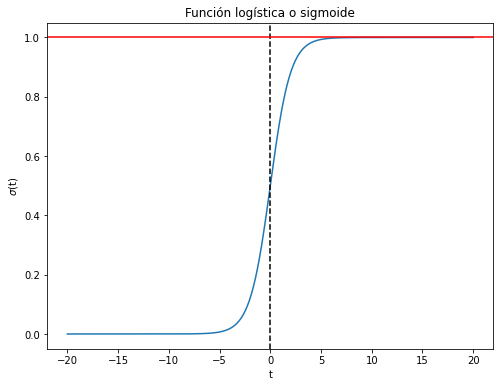

In [368]:
x = np.linspace(-20,20,400)
y=sigmoide(x)

plt.figure(figsize=(8,6))

plt.plot(x,y)
plt.axvline(x=0,color='k',linestyle='--')
plt.axhline(y=0,xmin=-15,xmax=0,color='r')
plt.axhline(y=1,xmin=0,xmax=15,color='r')
plt.xlabel("t")
plt.ylabel("$\sigma$(t)")
plt.title("Función logística o sigmoide")

In [369]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=[1000,1000], centers=None, n_features=2, cluster_std=6, random_state=202)

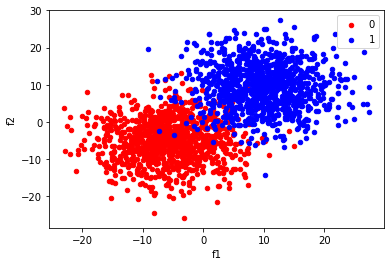

In [370]:
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.ylabel('f2')
plt.xlabel('f1')
plt.show()

In [371]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1600, 2) (1600,)
Test set: (400, 2) (400,)


In [372]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)


[(-22.981715497289997, 27.37181699382255),
 Text(0, 0.5, '$X_2$'),
 (-25.814445291719665, 27.365133706091257),
 Text(0.5, 0, '$X_1$'),
 None]

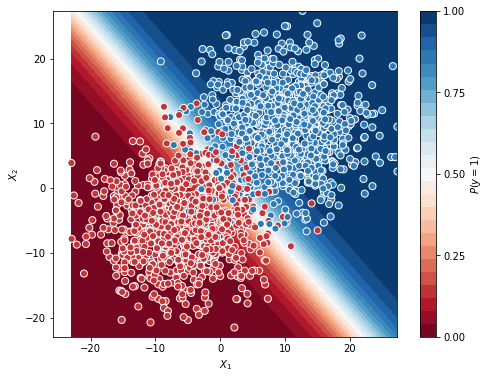

In [373]:
xx, yy = np.mgrid[X.min(0)[0]:X.max(0)[0]:.01, X.min(0)[1]:X.max(0)[1]:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LR.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(X.min(0)[1], X.max(0)[1]), ylim=(X.min(0)[0], X.max(0)[0]),
       xlabel="$X_1$", ylabel="$X_2$")

In [374]:
##Precisión
LR.score(X,y)


0.9505

## Precisión y exhaustividad 

La precisión mide cuántas de las muestras predichas como positivas son realmente positivas:

$$\text{Precisión} = \frac{TP}{TP + FP}$$

La precisión se utiliza como una métrica de rendimiento cuando el objetivo es limitar el número de falsos positivos. 

La exhaustividad, por otro lado, mide cuántas de las muestras positivas son capturadas por las predicciones positivas:

$$\text{Exhaustividad} = \frac{TP}{TP + FN}$$

La exhaustividad se utiliza como métrica de rendimiento cuando necesitamos identificar todas las muestras positivas; es decir, cuando es importante evitar falsos negativos.


In [375]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

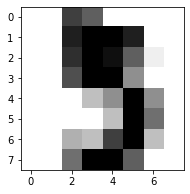

In [376]:
#mostramos el dígito 9
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[5], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [377]:
logreg = LogisticRegression(C=0.1, solver="liblinear")
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Puntaje LogReg: {:.2f}".format(logreg.score(X_test, y_test)))

Puntaje LogReg: 0.96


In [378]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.95      0.95      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.98      0.98        48
           6       0.98      1.00      0.99        52
           7       0.98      0.94      0.96        48
           8       0.94      0.92      0.93        48
           9       0.98      0.94      0.96        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



## Matriz de confusión: 
Una de las formas más completas de representar el resultado de evaluar la clasificación binaria


In [379]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  1  0  2  0]
 [ 0  0 42  2  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  1 44]]


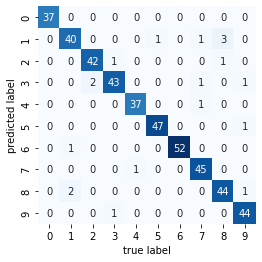

In [380]:
sns.heatmap(confusion.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('true label')
plt.ylabel('predicted label');

## Otros estimadores lineales


### Regresión Ridge

Con este algorítmo se "castigará" los coeficientes calculados, de tal manera que se modifique el error de los mínimos cuadrados con:

$$\sum (Y_i-\hat Y_i)^2+\alpha \sum w_i^2 $$


El hiperparámetro $\alpha$, llamado complejidad, controla qué tanto se penaliza los coeficientes, haciendo que éstos sean más pequeños y por tanto estabilizando las soluciones aunque a costa de una menor sesibilidad a los datos.

In [381]:
Diamantes.dropna(inplace=True)
X = Diamantes.drop(['price','cut','color','clarity'], axis=1,inplace=False)
y = Diamantes['price']

In [382]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
X_train.shape,X_test.shape

((43152, 6), (10788, 6))

In [383]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [384]:
X.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [385]:
linearM  = LinearRegression(normalize=True).fit(X_train,y_train)

print('R2 =',linearM.score(X_test,y_test))
print('wi =',linearM.coef_)
print('w0 =',linearM.intercept_)

y_pred = linearM.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred)/y_test.mean())
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))/y_test.mean())

R2 = 0.8572804866414163
wi = [10769.82885912  -205.95702872  -104.5492316  -1310.5001933
    41.92745122    20.52940121]
w0 = 21264.403841558586
MAE:  0.22500816486838415
RMSE:  0.3803465279203423


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [386]:
#Modelo Ridge
ridge=Ridge(alpha=0.2,normalize=True).fit(X_train,y_train)
print('R2 Ridge =',ridge.score(X_test,y_test))
print('wi Ridge =',ridge.coef_)
print('w0 Ridge =',ridge.intercept_)
y_pred = ridge.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred)/y_test.mean())
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))/y_test.mean())

R2 Ridge = 0.8180128845072316
wi Ridge = [3224.86552173  -83.69519371  -58.05277819  671.33440389  539.50128283
  816.57626862]
w0 Ridge = 36.06258795716667
MAE:  0.29438804650526296
RMSE:  0.4294949865143159


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


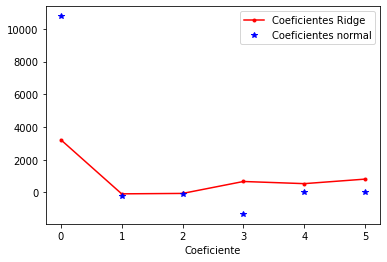

In [387]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ridge.coef_,'r.-',label=r'Coeficientes Ridge')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes normal')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

In [388]:
list(zip(X.columns,ridge.coef_))

[('carat', 3224.8655217286455),
 ('depth', -83.69519370780287),
 ('table', -58.052778185841646),
 ('x', 671.3344038906367),
 ('y', 539.5012828329444),
 ('z', 816.5762686167805)]

### Regresión Lasso

Al igual que el algorítmo Ridge, Lasso impone una penalidad sobre la función de error del OLS, pero ésta en cambio está dada por el valor absoluto de los coeficientes, así:
$$\sum (Y_i-\hat Y_i)^2+\alpha \sum |w_i|$$

Esto hace que a diferencia de Ridge que buscaba hacer pequeños los valores de algunos $w_i$, Lasso fuerza a que sean 0.

Así, puede decirse que Ridge es bueno cuando esperamos que todos los predictores tengan una influencia sobre el predictor así sea pequeña, mientras que Lasso se usará cuando esperamos que el numero de predictores relevantes sea pequeño (predictores con peso diferente de 0).

In [389]:
from sklearn.linear_model import Lasso

#modelo Lasso
lasso  = Lasso(alpha=5,normalize=True)
lasso.fit(X_train,y_train)
print('R2 Lasso =',lasso.score(X_test,y_test))
print('wi Lasso =',lasso.coef_)
print('w0 Lasso =',lasso.intercept_)

y_pred = lasso.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred)/y_test.mean())
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))/y_test.mean())

R2 Lasso = 0.7825227184801931
wi Lasso = [5573.89590302   -0.            0.            0.            0.
    0.        ]
w0 Lasso = -512.5758655660652
MAE:  0.3071764574744644
RMSE:  0.4695098693334565


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [390]:
list(zip(X.columns,lasso.coef_))

[('carat', 5573.895903021686),
 ('depth', -0.0),
 ('table', 0.0),
 ('x', 0.0),
 ('y', 0.0),
 ('z', 0.0)]

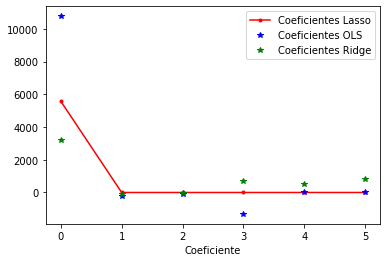

In [391]:
plt.figure()
plt.plot(lasso.coef_,'r.-',label=r'Coeficientes Lasso')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.plot(ridge.coef_,'g*',label=r'Coeficientes Ridge')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

In [392]:
print('numero de coeficientes:',len(linearM.coef_))
print('numero de coeficientes diferentes a cero para Ridge:',len(ridge.coef_[ridge.coef_!=0]))
print('numero de coeficientes diferentes a cero para Lasso:',len(lasso.coef_[lasso.coef_!=0]))

numero de coeficientes: 6
numero de coeficientes diferentes a cero para Ridge: 6
numero de coeficientes diferentes a cero para Lasso: 1


Como vemos, Lasso ha disminuído el número de coeficientes mientras que Ridge no lo hace.

La elección entre éstos 3 tipos de regresión lineal depende fuertemente de nuestro dataset (sus correlaciones), nuestro conocimiento del campo (relaciones esperadas de las variables predictoras y la variable diana) y nuestras necesidades computacionales.

### Máquinas de Soporte Vectorial (Support Vector Machine SVM)

Clasifica los datos al encontrar una línea (o hiperplano) donde la distancia entre los datos en diferentes categorías se vuelve máxima. 

Habría muchas líneas o planos que dividen los datos en dos categorías diferentes, pero los puntos que superan el límite de clasificación pueden ocurrir en los datos de evaluación o datos futuros desconocidos a medida que los puntos cercanos al límite cambian ligeramente

Sirven tanto para solucionar problemas de clasificación como de regresión. 

El punto de la categoría más cercano a la línea límite se denomina vector de soporte y cada clasificación debe tener al menos un vector de soporte.

$$ 1/2|m|+C \sum (ε_i-\hat ε_i)$$



![figura](https://drive.google.com/uc?export=view&id=1uvrJMLl_MHKRKRphw45QTufjpR30X0gI)







Sin embargo, no siempre es posible clasificar todos los datos linealmente. A veces, la clasificación de datos debe hacerse en una curva o en un plano de clasificación no lineal más complejo.

Si es así, use el método de trucos de Kernel para mapear los datos dados en una dimensión superior y encuentre un hiperplano que pueda clasificar los datos en la dimensión convertida.

Un kernel transofrma un espacio de datos de entrada en la forma requerida. 


<li>PROS:
<ul>
<li>No es muy sensible a los valores atípicos. </li>
<li>performance es bueno</li>
<li> beuna precisión y realizan predicciones más rápidas en comparación de otros algoritmos como el de Naive Bayes</li>
</ul>
</li>

<li>Contras:
<ul>
<li>El entrenamiento es relativamente lento</li>
<li>Funciona mal para datos de gran tamaño.</li>
<li> El núcleo y el conjunto de hiperparámetros deben optimizarse cuidadosamente.</li>
</ul>
</li>


#### SVR Lineal
Aquí se selecciona el hiperplano regresor que mejor se ajuste a nuestro conjunto de datos de entrenamiento. Se considera una distancia margen ε. Para las instancias que tengan la mayor distancia ε serán considerados como vectores soporte.

In [393]:
import sklearn.svm as svm  
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

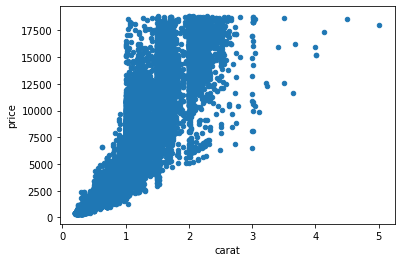

In [394]:
Diamantes.plot(x='carat', y='price',kind='scatter')

In [395]:
X = Diamantes['carat'].values.reshape(-1,1)
y = Diamantes['price'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
print(len(X))
print(len(X_train))
print(len(X_test))

53940
40455
13485


In [415]:
estimador=svm.LinearSVR(C=10).fit(X_train, y_train)
print('R2-train: ', estimador.score(X_train, y_train))
print('R2-test: ', estimador.score(X_test, y_test))

R2-train:  0.8223267384623014
R2-test:  0.8223898148368158


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


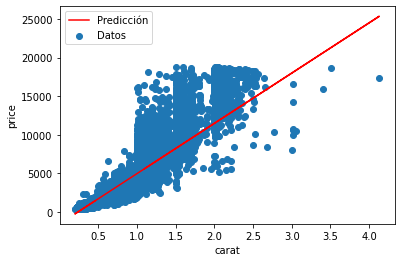

In [416]:
y_pred = estimador.predict(X_test)

plt.scatter(X_test,y_test, label='Datos')
plt.plot(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('carat')
plt.ylabel('price')
plt.legend()
plt.show()

In [417]:
print('MAE', metrics.mean_absolute_error(y_test, y_pred)/y_test.mean())
print('MSE: ', metrics.mean_squared_error(y_test, y_pred)/y_test.mean()**2)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_test.mean())


MAE 0.24189017037048327
MSE:  0.1820848154956746
RMSE:  0.4267139738697042


### SVR con Kernel
Para el caso en el que la función que se desea ajustar no puede ser ajustada con una recta, el método que se utiliza es mapear los puntos a una mayor dimensionalidad en la que si se pueda hacer el ajuste lineal y luego la solución dada se mapea de regreso al espacio original. 

In [420]:
X = Diamantes['carat'].values.reshape(-1,1)
y = Diamantes['price'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)


In [419]:
estimator=svm.SVR(kernel='linear').fit(X_train, y_train)
print('R2-train: ', estimator.score(X_train, y_train))
print('R2-test: ', estimator.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2-train:  0.7600971453469332
R2-test:  0.7590364306740646


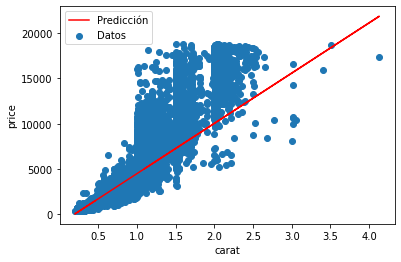

In [421]:
y_pred = estimator.predict(X_test)

plt.scatter(X_test,y_test, label='Datos')
plt.plot(X_test,y_pred, color='r', label='Predicción')
plt.xlabel('carat')
plt.ylabel('price')
plt.legend()
plt.show()

In [422]:
print('MAE', metrics.mean_absolute_error(y_test, y_pred)/y_test.mean())

MAE 0.26119217839581094


#### Clasificación

Predecir el tipo de categoría al cual pertence de una lista predefinida de posibilidades. 

* Binaria: 2 posibles posibilidades
* Multiclase: varias posibilidades

In [423]:
from sklearn.datasets import *
from sklearn.model_selection import train_test_split

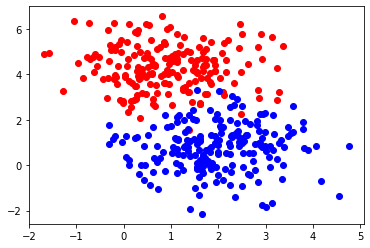

In [281]:
X,y = make_blobs(400, centers=2, cluster_std=1, random_state=0)
X.shape, y.shape

plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue")

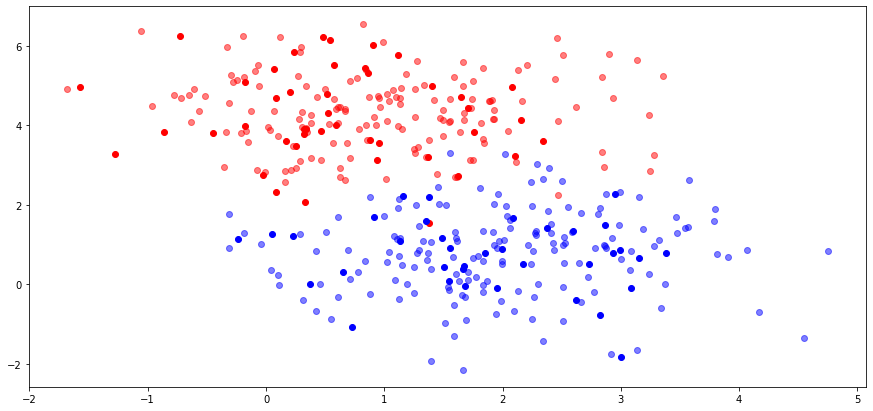

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

plt.figure(figsize=(15,7))
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="red", alpha=0.5)
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="blue", alpha=0.5)

plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color="red")
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color="blue")

In [424]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [284]:
import numpy as np
import matplotlib.cm as cm

def plot_2D_boundary(predict, mins, maxs, line_width=3, line_color="black", line_alpha=1, label=None):
    n = 200
    mins -= np.abs(mins)*.2
    maxs += np.abs(maxs)*.2
    d0 = np.linspace(mins[0], maxs[0],n)
    d1 = np.linspace(mins[1], maxs[1],n)
    gd0,gd1 = np.meshgrid(d0,d1)
    D = np.hstack((gd0.reshape(-1,1), gd1.reshape(-1,1)))
    preds = predict(D)
    levels = np.sort(np.unique(preds))
    levels = [np.min(levels)-1] + [np.mean(levels[i:i+2]) for i in range(len(levels)-1)] + [np.max(levels)+1]
    p = (preds*1.).reshape((n,n))
    plt.contour(gd0,gd1,p, levels=levels, alpha=line_alpha, colors=line_color, linewidths=line_width)
    if label is not None:
        plt.plot([0,0],[0,0], lw=line_width, color=line_color, label=label)
    return np.sum(p==0)*1./n**2, np.sum(p==1)*1./n**2


def plot_2Ddata(X, y, dots_alpha=.5, noticks=False):
    colors = cm.hsv(np.linspace(0, .7, len(np.unique(y))))
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X[y==label][:,0], X[y==label][:,1], color=colors[i], alpha=dots_alpha)
    if noticks:
        plt.xticks([])
        plt.yticks([])

C= 0.01
score_train 0.953125
score_test 0.95


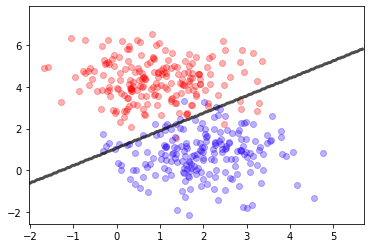

C= 0.1
score_train 0.971875
score_test 0.9875


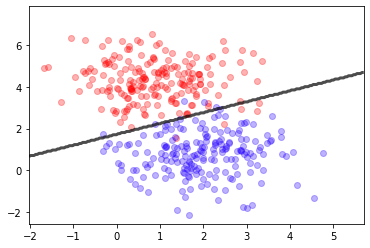

C= 1.0
score_train 0.978125
score_test 0.975


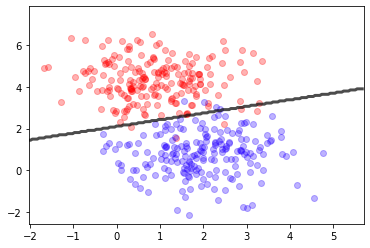

C= 10.0
score_train 0.98125
score_test 0.975


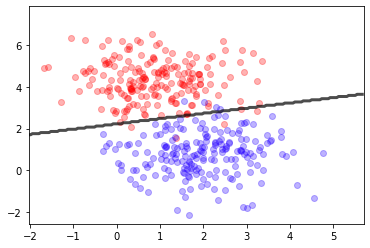

In [285]:
for C_param in np.array([0.01,0.1,1.0,10]):
  sv = LinearSVC(C=C_param, max_iter=10000)
  sv.fit(X_train,y_train)
  print ("C=", C_param)
  print ("score_train",sv.score(X_train,y_train))
  print ("score_test",sv.score(X_test,y_test))
  plot_2Ddata(X, y, dots_alpha=.3)
  plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                   line_width=3, line_alpha=.7, label=None)
  plt.show()


#### multiclases clasificador

##### Clasificación- Máquina de soporte vectorial
